In [1]:
import pandas as pd
import os
import numpy as np

# Define file path
excel_file = os.path.join(r'ImportFile.xlsx')

# Import data
GDP_dat = pd.read_excel(excel_file, sheet_name='GDP')
Emp_dat = pd.read_excel(excel_file, sheet_name='Emp')
Cons_dat = pd.read_excel(excel_file, sheet_name='Cons')
IPExp_dat = pd.read_excel(excel_file, sheet_name='IPExp')

# Convert 'Date' columns to datetime
GDP_dat['Date'] = pd.to_datetime(GDP_dat['Date'])
Emp_dat['Date'] = pd.to_datetime(Emp_dat['Date'])
Cons_dat['Date'] = pd.to_datetime(Cons_dat['Date'])
IPExp_dat['Date'] = pd.to_datetime(IPExp_dat['Date'])

# Merge all datasets on 'Date'
data = GDP_dat[['Date', 'GDP']].merge(Emp_dat, on='Date', how='left')
data = data.merge(Cons_dat, on='Date', how='left')
data = data.merge(IPExp_dat, on='Date', how='left')

# Set 'Date' as index if desired
data.set_index('Date', inplace=True)

# Check data
print(data.head())


                                    GDP    U  Claims      Cons  Sentiment  \
Date                                                                        
1970-01-01 00:00:00.000001995  0.898704  5.6  333500 -0.004842       97.6   
1970-01-01 00:00:00.000001995  0.898704  5.6  333500 -0.004842       97.6   
1970-01-01 00:00:00.000001995  0.898704  5.6  333500 -0.004842       97.6   
1970-01-01 00:00:00.000001995  0.898704  5.6  333500 -0.004842       97.6   
1970-01-01 00:00:00.000001995  0.898704  5.6  333500 -0.004842       97.6   

                                     IP       Exp  
Date                                               
1970-01-01 00:00:00.000001995  0.182841  0.466375  
1970-01-01 00:00:00.000001995 -0.162622 -0.064958  
1970-01-01 00:00:00.000001995  0.144061  2.016583  
1970-01-01 00:00:00.000001995 -0.063889  1.126669  
1970-01-01 00:00:00.000001995  0.339689  1.046501  


In [2]:
data = data[~data.index.duplicated(keep='first')]
data.head()

,GDP,U,Claims,Cons,Sentiment,IP,Exp
Date,,,,,,,
1970-01-01 00:00:00.000001995,0.898704,5.6,333500,-0.004842,97.6,0.182841,0.466375
1970-01-01 00:00:00.000001996,1.233592,5.6,374000,-0.451704,89.3,-0.653670,-1.117690
1970-01-01 00:00:00.000001997,1.245604,5.3,339000,0.473086,97.4,0.141756,0.093353
1970-01-01 00:00:00.000001998,1.147320,4.6,321200,-0.088385,106.6,0.513545,-0.037956
1970-01-01 00:00:00.000001999,1.326373,4.3,326200,-0.143855,103.9,0.468131,0.116098


In [3]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < signif:
        print("Series is stationary")
    else:
        print("Series is not stationary")

for col in data.columns:
    print(f"Testing stationarity for {col}")
    test_stationarity(data[col])


Testing stationarity for GDP
ADF Statistic: -2.738982125202568
p-value: 0.06753213969984018
Series is not stationary
Testing stationarity for U
ADF Statistic: -2.4197438449834996
p-value: 0.13624121735107497
Series is not stationary
Testing stationarity for Claims
ADF Statistic: -2.0642359947718107
p-value: 0.2591364335970392
Series is not stationary
Testing stationarity for Cons
ADF Statistic: -4.771310383674473
p-value: 6.169196035797275e-05
Series is stationary
Testing stationarity for Sentiment
ADF Statistic: -1.992699716415523
p-value: 0.2897831642920363
Series is not stationary
Testing stationarity for IP
ADF Statistic: -4.5218419933929574
p-value: 0.0001795220495981995
Series is stationary
Testing stationarity for Exp
ADF Statistic: -2.029698128901216
p-value: 0.2737051939553059
Series is not stationary


In [4]:
# First differencing of non-stationary series
data_diff = data.copy()  # Create a copy to store the differenced data
non_stationary_columns = ['GDP', 'U', 'Claims', 'Sentiment', 'Exp']  # List non-stationary columns based on ADF test results

for col in non_stationary_columns:
    data_diff[col] = data[col].diff().dropna()  # Apply differencing

# Drop the first row after differencing (it will be NaN)
data_diff = data_diff.dropna()

# Check stationarity again
for col in data_diff.columns:
    print(f"Re-testing stationarity for {col}")
    test_stationarity(data_diff[col])


Re-testing stationarity for GDP
ADF Statistic: -4.559666033792099
p-value: 0.0001531829494081604
Series is stationary
Re-testing stationarity for U
ADF Statistic: -3.399748388603772
p-value: 0.010967452014455316
Series is stationary
Re-testing stationarity for Claims
ADF Statistic: -5.392131194274992
p-value: 3.5185167789439313e-06
Series is stationary
Re-testing stationarity for Cons
ADF Statistic: -2.899673986150529
p-value: 0.0453859215834954
Series is stationary
Re-testing stationarity for Sentiment
ADF Statistic: -5.50904405528348
p-value: 1.991315403717978e-06
Series is stationary
Re-testing stationarity for IP
ADF Statistic: -4.536997408237253
p-value: 0.0001684885144366308
Series is stationary
Re-testing stationarity for Exp
ADF Statistic: -6.141125285480566
p-value: 7.966634521832025e-08
Series is stationary


/Users/chiarawillvonseder/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Jul, 2024
Time:                     22:56:25
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    23.8006
Nobs:                     23.0000    HQIC:                   19.9205
Log likelihood:          -337.542    FPE:                7.19013e+08
AIC:                      18.6168    Det(Omega_mle):     2.13967e+07
--------------------------------------------------------------------
Results for equation GDP
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.185393         0.186308           -0.995           0.320
L1.GDP              -0.305779         0.356486           -0.858           0.391
L1.U                -0.195694         0.633105           -0.309   

<Figure size 1400x1000 with 0 Axes>

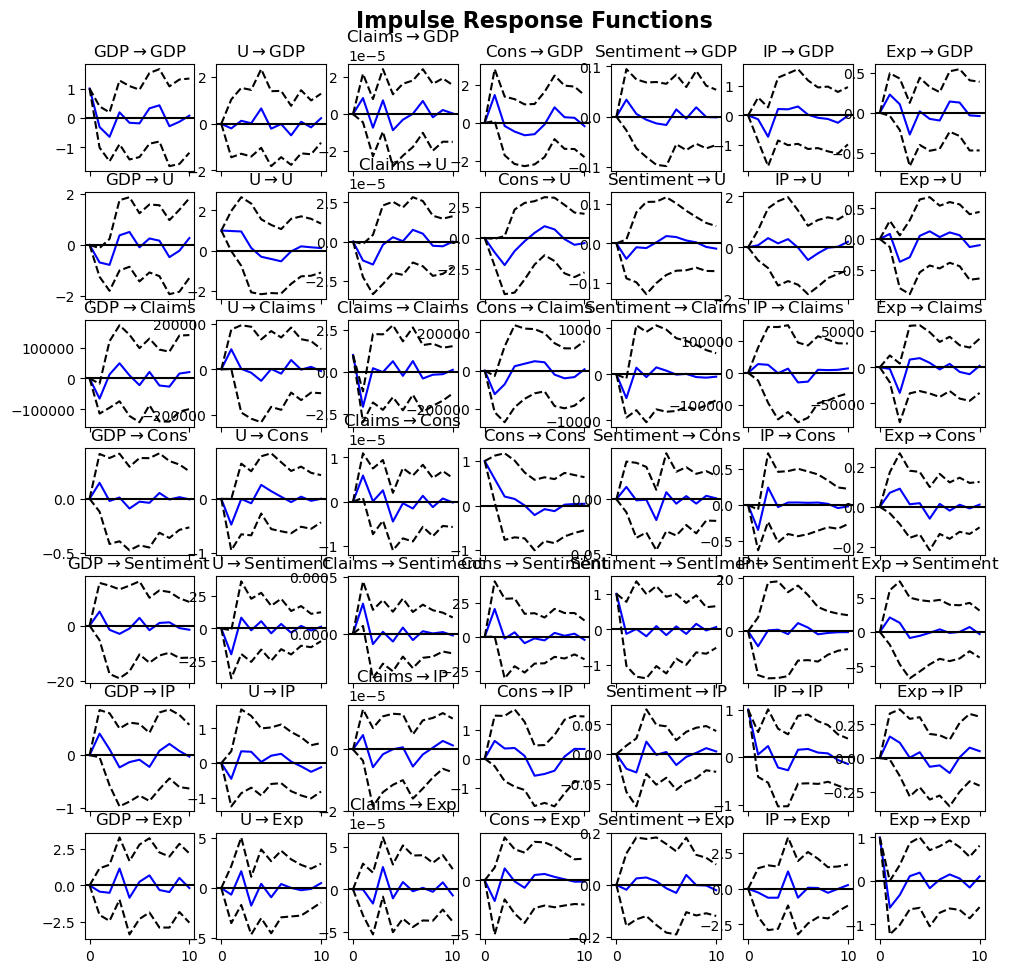

<Figure size 1400x1000 with 0 Axes>

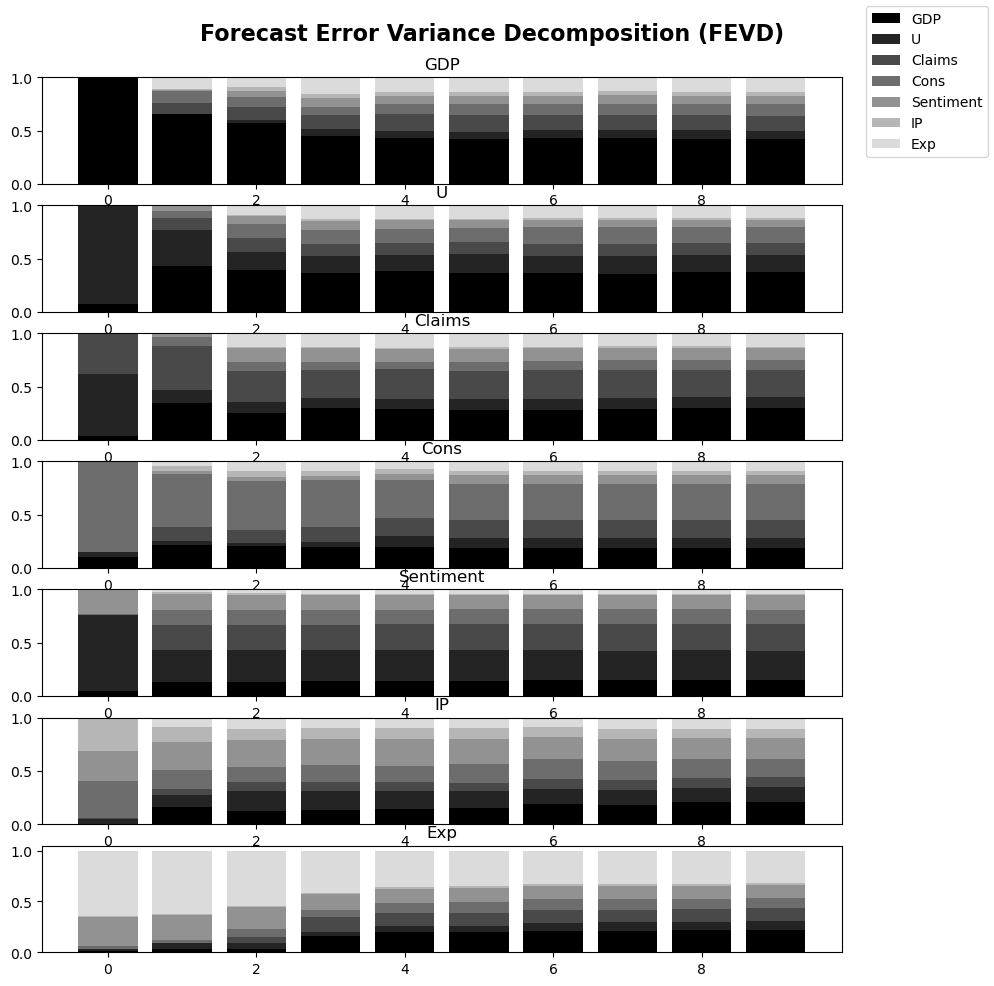

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Fit VAR Model on the differenced data
model_diff = VAR(data_diff)
results_diff = model_diff.fit(maxlags=2, ic='aic')  # Using AIC to select the best lag length
print(results_diff.summary())

# Perform Impulse Response Analysis with enhanced global settings
plt.figure(figsize=(14, 10))  # Set a larger figure size globally for all subplots
irf_diff = results_diff.irf(10)  # Analyzing 10 periods
irf_diff.plot()
plt.suptitle('Impulse Response Functions', fontsize=16, fontweight='bold')  # Set a title with a larger font
plt.show()

# Forecast Error Variance Decomposition (FEVD) with enhanced settings
plt.figure(figsize=(14, 10))
fevd_diff = results_diff.fevd(10)  # Up to 10 periods ahead
fevd_diff.plot()
plt.suptitle('Forecast Error Variance Decomposition (FEVD)', fontsize=16, fontweight='bold')
plt.show()



In [15]:
import scipy.stats as stats

# Extracting the parameters (coefficients), t-values, and we calculate p-values
coefs = results_diff.params
tvalues = results_diff.tvalues
pvalues = pd.DataFrame(2 * (1 - stats.norm.cdf(np.abs(tvalues))), columns=coefs.columns, index=coefs.index)  # Calculate p-values

# Creating a DataFrame to display results
results_df = pd.DataFrame({
    'Coefficient': coefs.stack(),
    'T-value': tvalues.stack(),
    'P-value': pvalues.stack()
})

# Function to apply conditional formatting for significance in DataFrame
def highlight_significant(val):
    color = 'red' if val < 0.05 else 'black'
    return f'color: {color}'

# Applying styling to DataFrame
styled_results = results_df.style.applymap(highlight_significant, subset=['P-value'])
styled_results
